In [ ]:
import os
import sys

style_dir = 'results/mpl_style/physrev_mplstyle/physrev.mplstyle'

from wrappers.orca_wrappers import orca_load
import matplotlib.pyplot as plt
from mace.calculators import MACECalculator
%matplotlib inline
%config InlineBackend.figure_format='retina' 

plt.style.use(style_dir)
plt.rcParams['figure.dpi'] = "300"
import numpy as np
from PIL import Image

/home/physics/phugjr/.local/lib/python3.11/site-packages/e3nn/o3/_wigner.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  _Jd, _W3j_flat, _W3j_indices = torch.load(os.pa

In [ ]:
def load_calculations(path):
    paths = os.listdir(path)
    results = []
    num_states = sorted(list(set(split[1] for split in (name.split('_') for name in paths))))
    num_angles = sorted(list(set(float(split[3]) for split in (name.split('_') for name in paths))))
    for state in num_states:
        state_results = []
        for angle in num_angles:
            angle_dir = f'state_{state}_angle_{angle}'
            angle_path = os.path.join(path, angle_dir)
            state_results.append(orca_load(angle_path))
        results.append(state_results)
    return results

def mace_calculations(atoms_list, model, head):
    predictions = []
    model = MACECalculator(model_paths = model, device = 'cpu')
    for atom in atoms_list:
        mace_atom = atom.copy()
        mace_atom.info['head'] = head
        mace_atom.calc = model
        mace_atom.get_potential_energy()
        predictions.append(mace_atom)
    return predictions

In [ ]:
raw_mace = 'testing-suite/oxirane/models/oxirane_raw_compiled.model'
sf_mace = 'testing-suite/oxirane/models/oxirane_isolated_compiled.model'


sf_calculation_path = 'oxirane/isolated_system/energies'
sf_results = load_calculations(sf_calculation_path)

atoms = sf_results[0]
raw_mace_1 = mace_calculations(atoms,raw_mace,'spin_flip_es1')
raw_mace_2 = mace_calculations(atoms,raw_mace,'spin_flip_es2')
raw_mace = [raw_mace_1, raw_mace_2]


sf_mace_1 = mace_calculations(atoms,sf_mace,'spin_flip_es1')
sf_mace_2 = mace_calculations(atoms,sf_mace,'spin_flip_es2')
sf_mace = [sf_mace_1, sf_mace_2]


No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.
No dtype selected, switching to float64 to match model dtype.


In [ ]:
sf_results = sf_results[1:3]

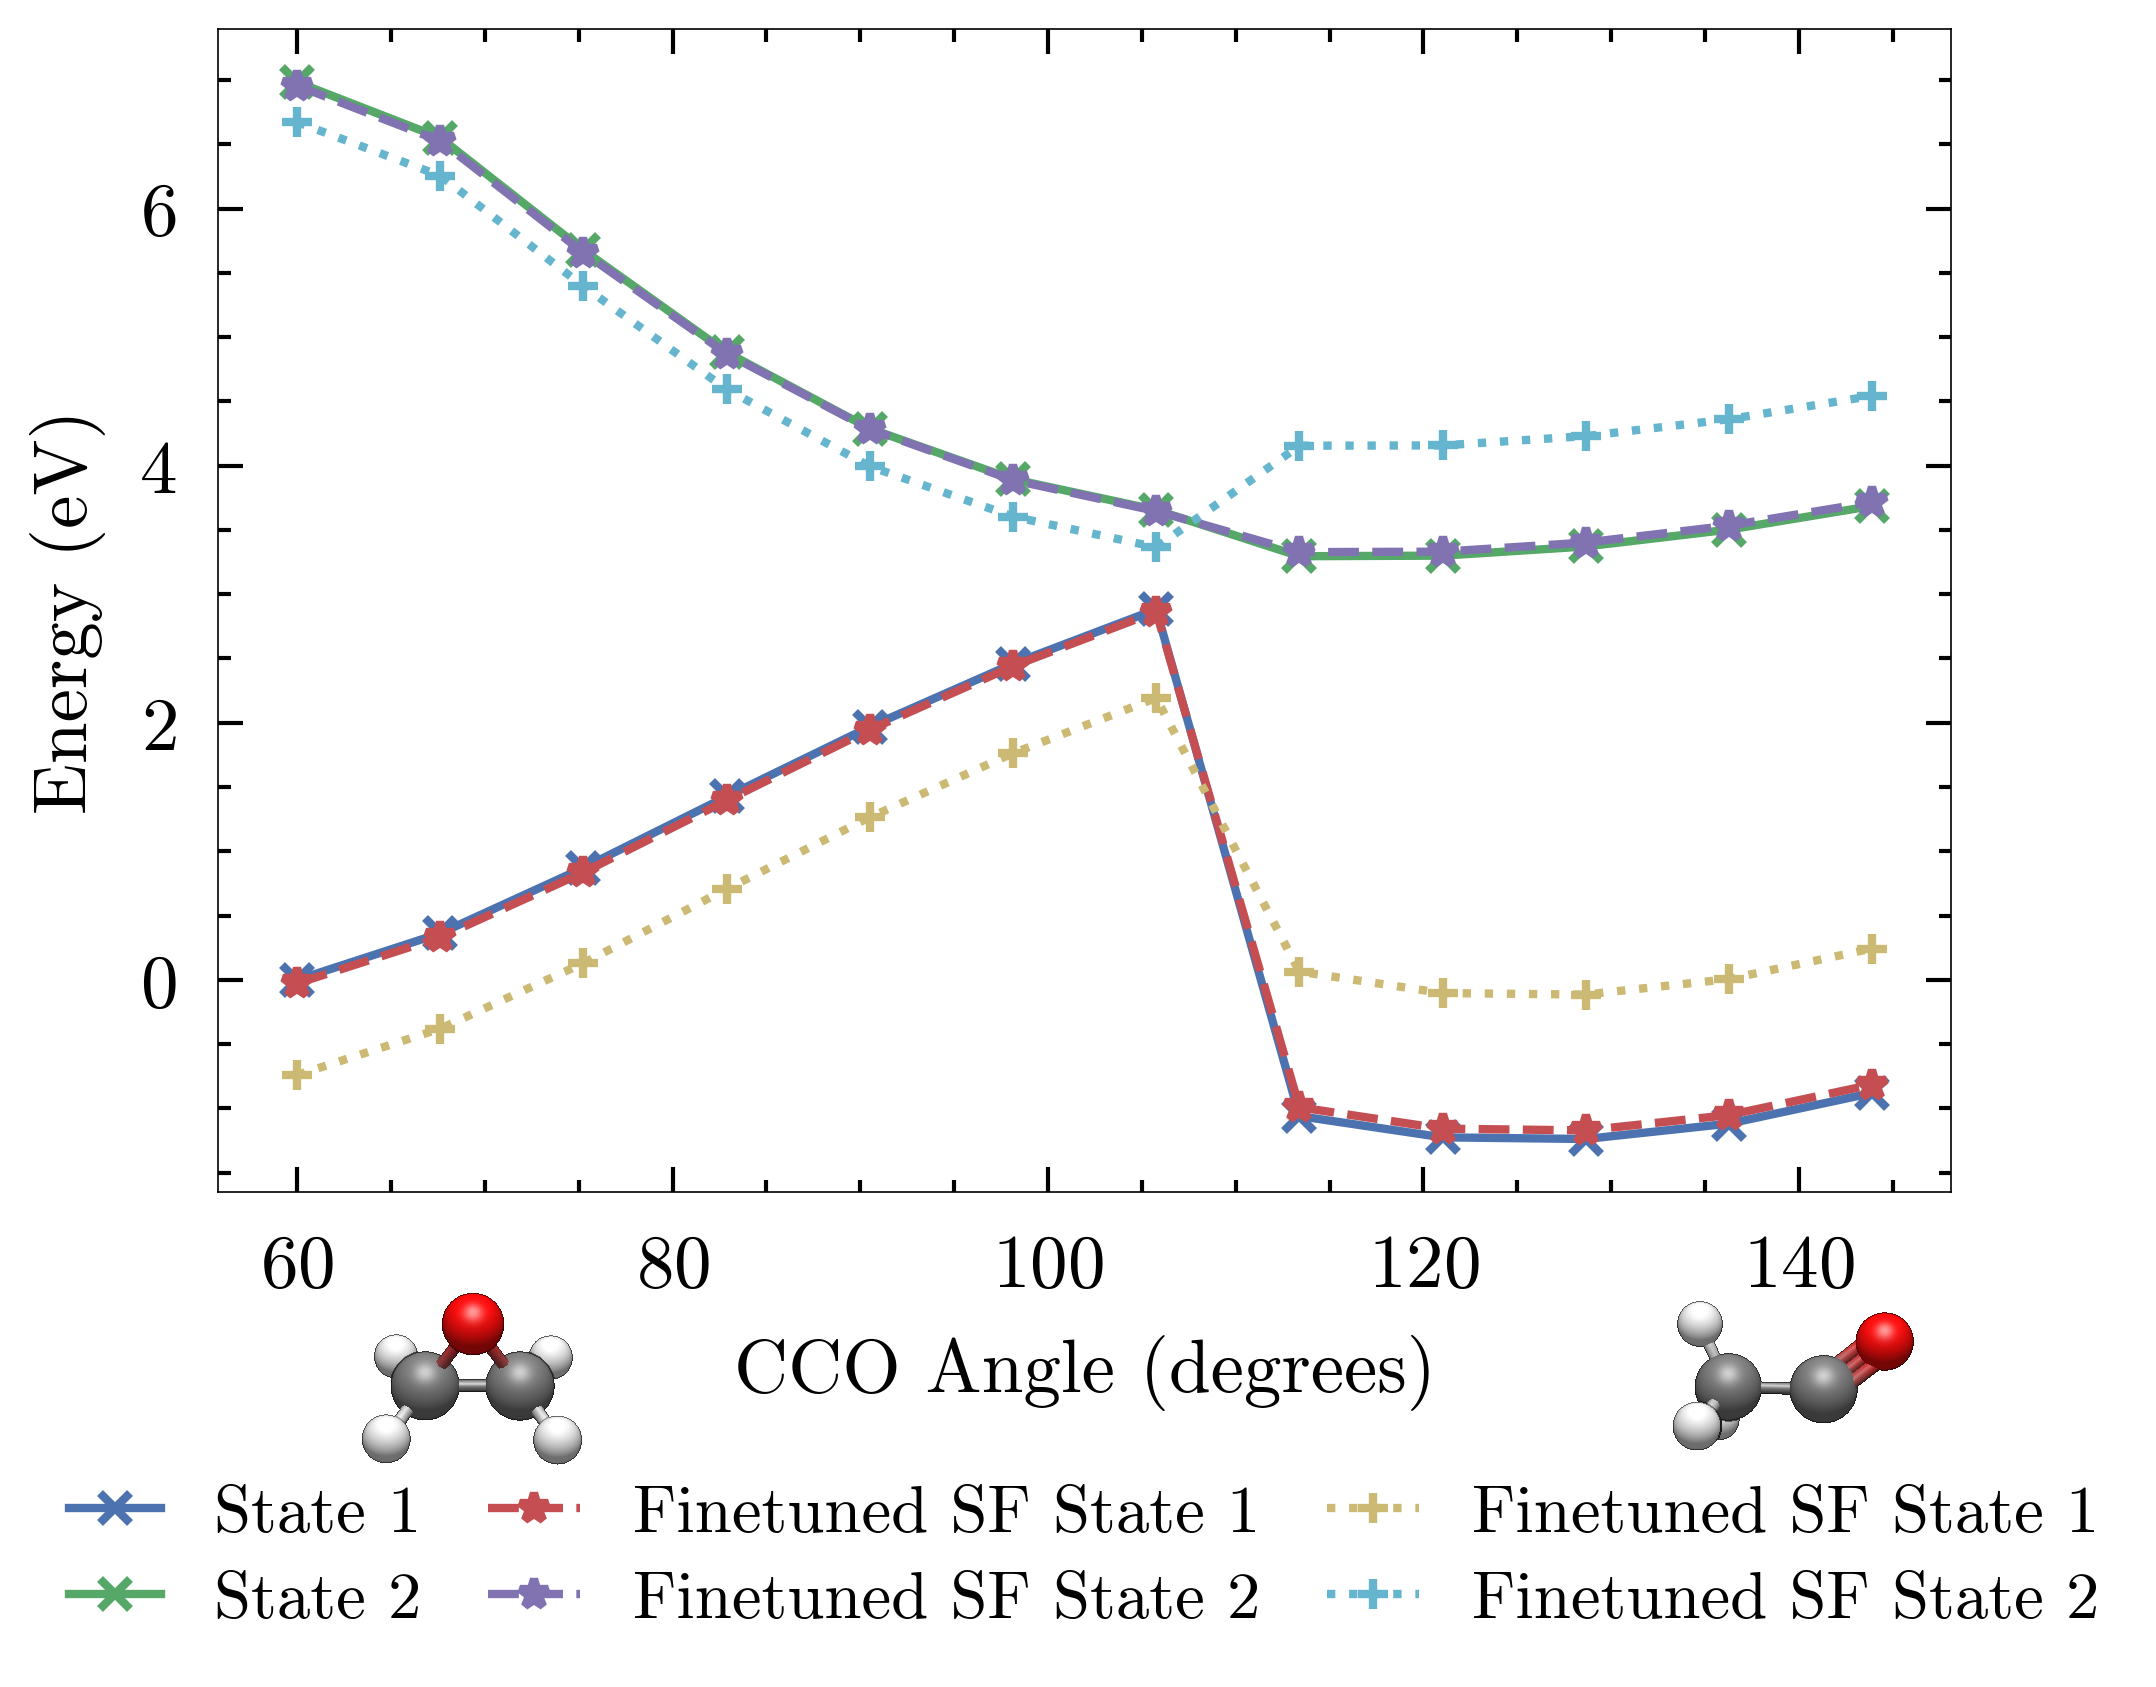

In [ ]:
figure = plt.figure(figsize=(3.5, 2.5))
angle_index = [0, 1, 2]
ax = figure.add_subplot(1, 1, 1)
norm_energy = sf_results[0][0].get_potential_energy()
for state, state_results in enumerate(sf_results):
    state_angles = []
    state_energies = []
    for ase_atom in state_results:
        angle = ase_atom.get_angle(*angle_index)
        energy = ase_atom.get_potential_energy()
        normalised_energy = energy - norm_energy
        state_angles.append(angle)
        state_energies.append(normalised_energy)
    label = f'State {state + 1}'
    ax.plot(state_angles[::5], state_energies[::5], marker = 'x', label=label, lw= 1)


for state, state_results in enumerate(sf_mace):
    state_angles = []
    state_energies = []
    for ase_atom in state_results:
        angle = ase_atom.get_angle(*angle_index)
        energy = ase_atom.get_potential_energy()
        normalised_energy = energy - norm_energy
        state_angles.append(angle)
        state_energies.append(normalised_energy)
    label = f'Finetuned SF State {state + 1}'
    ax.plot(state_angles[::5], state_energies[::5], marker = '*', ls = '--', label=label, lw= 1)

for state, state_results in enumerate(raw_mace):
    state_angles = []
    state_energies = []
    for ase_atom in state_results:
        angle = ase_atom.get_angle(*angle_index)
        energy = ase_atom.get_potential_energy()
        normalised_energy = energy - norm_energy
        state_angles.append(angle)
        state_energies.append(normalised_energy)
    label = f'Finetuned SF State {state + 1}'
    ax.plot(state_angles[::5], state_energies[::5], marker = '+', ls = ':', label=label, lw= 1)

ax.set_xlabel('CCO Angle (degrees)')
ax.set_ylabel('Energy (eV)')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
oxirane_60 = Image.open('report_data/graphs/oxirane/oxirane_60.png')
oxirane_60 = np.array(oxirane_60)
figure.figimage(oxirane_60, 360, 220, zorder=0)
oxirane_140 = Image.open('report_data/graphs/oxirane/oxirane_140.png')
oxirane_140 = np.array(oxirane_140)
figure.figimage(oxirane_140, 1665, 218, zorder=0)